### Summary

I did not finish this problem and below is just a mess of stuff I was trying as I worked through the data. I spent a good amount of time trying to understand the rollup data file and what it's used for. Eventually I abandoned it.   

After a group discussion, the solutions seems to be that a bug introduced in the code that broke links in some emails sent to users. This was determined by observing that emails were being opened by users, but the email click through dropped. 

I observed that user signups continued along an upward trend. One hypothesis that a particularly large company dropped off usage was untested because I ran out of time to observe the rate of engagement for the top large companies that use the service. 

In addition, another colleague obvserved that the email click through problem was possibly only an issue with mobile devices. It was observed that the email clickthrough rate dropped for mobile devices but not for desktops.

Both of these conclusions can be found in the plots made below. 

## The problem

You show up to work Tuesday morning, September 2, 2014. The head of the Product team walks over to your desk and asks you what you think about the latest activity on the user engagement dashboards. You fire them up, and something immediately jumps out:


https://modeanalytics.com/modeanalytics/reports/cbb8c291ee96/runs/7925c979521e/viz1/cfcdb6b78885

The above chart shows the number of engaged users each week. Yammer defines engagement as having made some type of server call by interacting with the product (shown in the data as events of type “engagement”). Any point in this chart can be interpreted as “the number of users who logged at least one engagement event during the week starting on that date.”

You are responsible for determining what caused the dip at the end of the chart shown above and, if appropriate, recommending solutions for the problem.

## Getting oriented

Before you even touch the data, come up with a list of possible causes for the dip in retention shown in the chart above. Make a list and determine the order in which you will check them. Make sure to note how you will test each hypothesis. Think carefully about the criteria you use to order them and write down the criteria as well.

Also, make sure you understand what the above chart shows and does not show.


### My Guesses

1. Holiday / Vacation. 
2. Increase in fee.
3. Competitor joins market. 
4. Negative Event (User credential theft). 
5. Server loss / Reduction in performance
6. code change results in loss of reporting of engagement?
7. change in tool layout / function
8. Loss of data
9. Insignificant statistical fluctuation
10. Loss of a large client

NB: After looking at the tables, I realize that I can't really determine any of these causes from the data except for the last two. :P

The data can be found on Mode Analytics. The tables are 

```
tutorials.yammer_users
tutorials.yammer_emails
tutorials.yammer_events
```

which I downloaded into the local `data` folder. 

In [17]:
import pandas as pd

In [18]:
usersdf = pd.read_csv('data/yammer_users.csv')

In [19]:
usersdf.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


### Help!

https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/

Thanks, Chris.

In [60]:
usersdf['created_at'] = pd.to_datetime(usersdf['created_at']).dt.normalize()

In [69]:
usersdf.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01,28.0,english,NaN,pending
2,2.0,2013-01-01,51.0,english,NaN,pending
3,3.0,2013-01-01,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01,5110.0,indian,2013-01-01 14:39:05,active


In [70]:
eventsdf = pd.read_csv('data/yammer_events.csv')

In [71]:
eventsdf.dtypes

user_id        float64
occurred_at     object
event_type      object
event_name      object
location        object
device          object
user_type      float64
dtype: object

In [87]:
eventsdf['occurred_at'] = pd.to_datetime(eventsdf['occurred_at']).dt.normalize()

In [88]:
eventsdf.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02,engagement,search_run,Japan,dell inspiron notebook,3.0


In [89]:
eventsdf.dtypes

user_id               float64
occurred_at    datetime64[ns]
event_type             object
event_name             object
location               object
device                 object
user_type             float64
dtype: object

In [74]:
emailsdf = pd.read_csv('data/yammer_emails.csv')

In [75]:
emailsdf['occurred_at'] = pd.to_datetime(emailsdf['occurred_at']).dt.normalize()

In [76]:
emailsdf.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06,sent_weekly_digest,1.0
1,0.0,2014-05-13,sent_weekly_digest,1.0
2,0.0,2014-05-20,sent_weekly_digest,1.0
3,0.0,2014-05-27,sent_weekly_digest,1.0
4,0.0,2014-06-03,sent_weekly_digest,1.0


#### Note:
This rollup data file was not part of the data set from the Mode Analytics. However, it was given to us in this data challenge and described as being useful in calculating rolling time windows to be used with time-series data. In the end, though, I did not use this, but instead used Pandas functions to aggregate counts by week. 

In [77]:
rollupdf = pd.read_csv('data/dimension_rollup_periods.csv')
rollupdf.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1.0,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1.0,2013-01-03 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1.0,2013-01-04 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1.0,2013-01-05 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-05 08:00:00,2013-01-06 08:00:00


### ToDo

I want to plot the number of engagement events per time period, along with sqrt(N) error bar. 

In [30]:
rollupdf7day = rollupdf[rollupdf['period_id'] == 1007]

In [34]:
rollupdf7day.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
1252,1007.0,2013-01-01 00:00:00,2012-12-25 00:00:00,2013-01-01 00:00:00,2012-12-25 08:00:00,2013-01-01 08:00:00
1253,1007.0,2013-01-02 00:00:00,2012-12-26 00:00:00,2013-01-02 00:00:00,2012-12-26 08:00:00,2013-01-02 08:00:00
1254,1007.0,2013-01-03 00:00:00,2012-12-27 00:00:00,2013-01-03 00:00:00,2012-12-27 08:00:00,2013-01-03 08:00:00
1255,1007.0,2013-01-04 00:00:00,2012-12-28 00:00:00,2013-01-04 00:00:00,2012-12-28 08:00:00,2013-01-04 08:00:00
1256,1007.0,2013-01-05 00:00:00,2012-12-29 00:00:00,2013-01-05 00:00:00,2012-12-29 08:00:00,2013-01-05 08:00:00


In [79]:
rollupdf['time_id'] = pd.to_datetime(rollupdf['time_id']).dt.normalize()
rollupdf['pst_start'] = pd.to_datetime(rollupdf['pst_start']).dt.normalize()
rollupdf['pst_end'] = pd.to_datetime(rollupdf['pst_end']).dt.normalize()

In [84]:
rollupdf.dtypes

period_id           float64
time_id      datetime64[ns]
pst_start    datetime64[ns]
pst_end      datetime64[ns]
utc_start            object
utc_end              object
dtype: object

In [90]:
eventsdf.index = eventsdf.occurred_at

In [95]:
eventsdf['event_name'].value_counts()

home_page                 94065
like_message              59248
view_inbox                55936
login                     38610
send_message              33105
search_autocomplete       17820
search_run                13019
create_user                7298
enter_email                4407
enter_info                 3872
complete_signup            3680
search_click_result_2      1499
search_click_result_1      1413
search_click_result_4      1264
search_click_result_3      1134
search_click_result_5       968
search_click_result_6       805
search_click_result_9       784
search_click_result_7       709
search_click_result_8       690
search_click_result_10      506
Name: event_name, dtype: int64

In [96]:
logindf = eventsdf[eventsdf['event_name'] == 'login']

In [97]:
logindf.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
occurred_at,,,,,,,
2014-05-02,10522.0,2014-05-02,engagement,login,Japan,dell inspiron notebook,3.0
2014-05-01,10612.0,2014-05-01,engagement,login,Netherlands,iphone 5,1.0
2014-05-09,10736.0,2014-05-09,engagement,login,Austria,iphone 4s,2.0
2014-05-15,10965.0,2014-05-15,engagement,login,Finland,windows surface,3.0
2014-05-08,11020.0,2014-05-08,engagement,login,Japan,macbook air,2.0


In [99]:
logindf.resample('W').count()

,user_id,occurred_at,event_type,event_name,location,device,user_type
occurred_at,,,,,,,
2014-05-04,967,967,967,967,967,967,967
2014-05-11,1999,1999,1999,1999,1999,1999,1999
2014-05-18,2021,2021,2021,2021,2021,2021,2021
2014-05-25,2088,2088,2088,2088,2088,2088,2088
2014-06-01,1995,1995,1995,1995,1995,1995,1995
2014-06-08,2173,2173,2173,2173,2173,2173,2173
2014-06-15,2184,2184,2184,2184,2184,2184,2184
2014-06-22,2264,2264,2264,2264,2264,2264,2264
2014-06-29,2266,2266,2266,2266,2266,2266,2266


In [101]:
%matplotlib inline

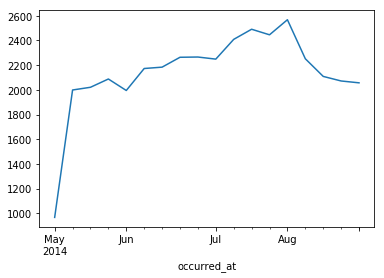

In [103]:
logindf.resample('W').count()['event_name'].plot()

In [108]:
import matplotlib.pyplot as plt

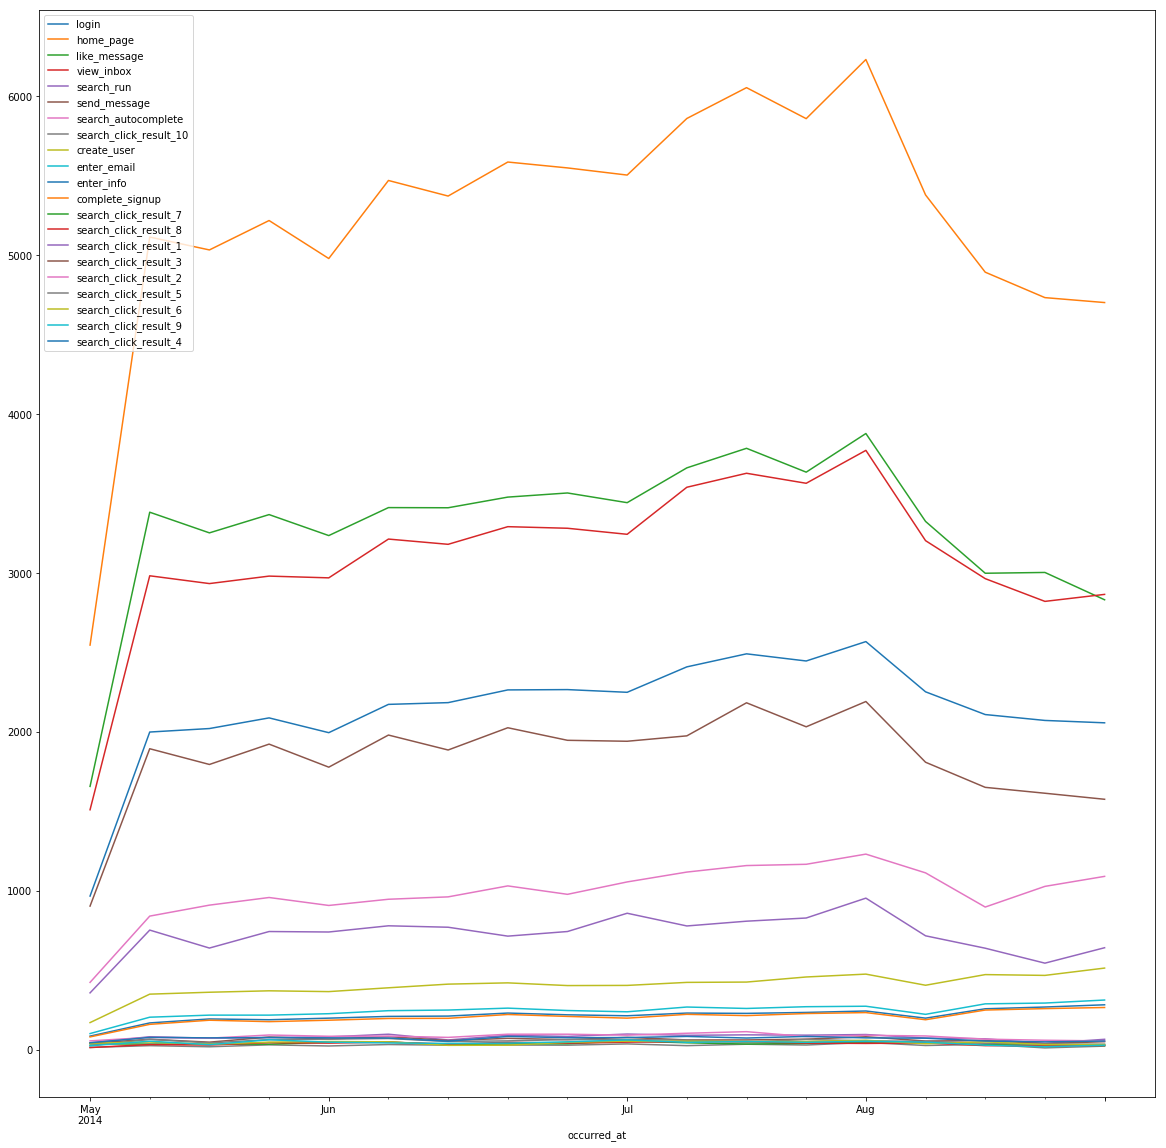

In [112]:
fig = plt.figure(figsize=(20,20))
for evname in eventsdf.event_name.unique():
    ax = eventsdf[eventsdf['event_name'] == evname].resample('W').count()['event_name'].plot(label=evname)
    ax.set_label(evname)
    ax.legend()

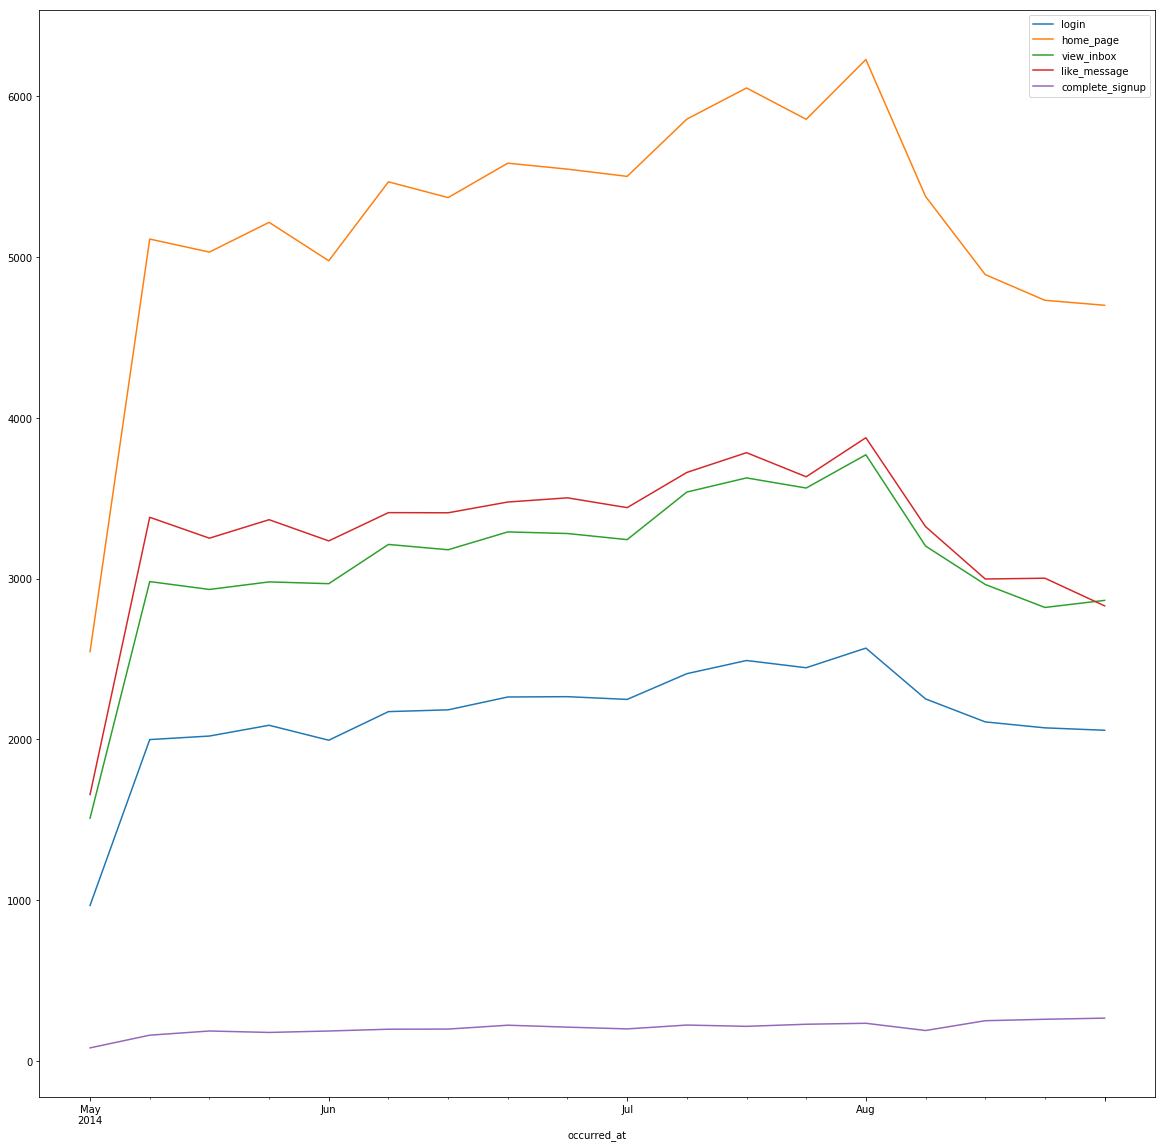

In [113]:
eventnames = ['login', 'home_page', 'view_inbox', 'like_message','complete_signup']
fig = plt.figure(figsize=(20,20))
for evname in eventnames:
    ax = eventsdf[eventsdf['event_name'] == evname].resample('W').count()['event_name'].plot(label=evname)
    ax.set_label(evname)
    ax.legend()

## todo

Normalize curves in order to compare them.

Looks like sign ups are continuing at the normal rate.

Hard to tell if there are relatively fewer logins, or if all, logins, home_page, like_message, and view_inbox, are all down by the same relative percentage.

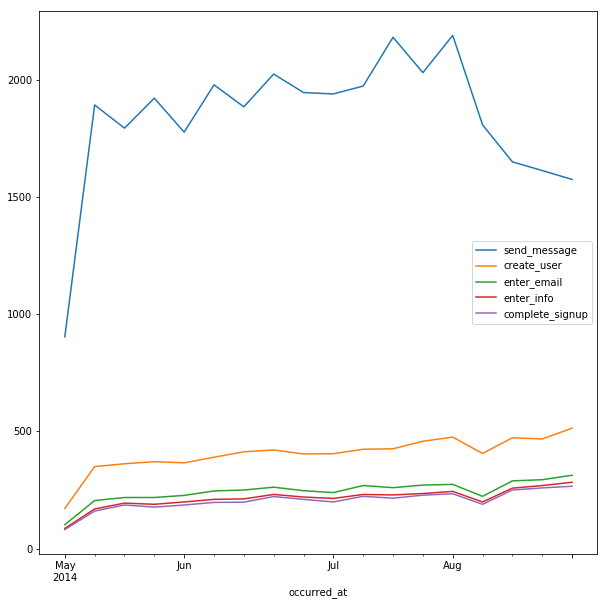

In [114]:
eventnames = ['send_message', 'create_user', 'enter_email', 'enter_info','complete_signup']
fig = plt.figure(figsize=(10,10))
for evname in eventnames:
    ax = eventsdf[eventsdf['event_name'] == evname].resample('W').count()['event_name'].plot(label=evname)
    ax.set_label(evname)
    ax.legend()

In [115]:
emailsdf.action.unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

In [117]:
emailsdf.index = emailsdf.occurred_at

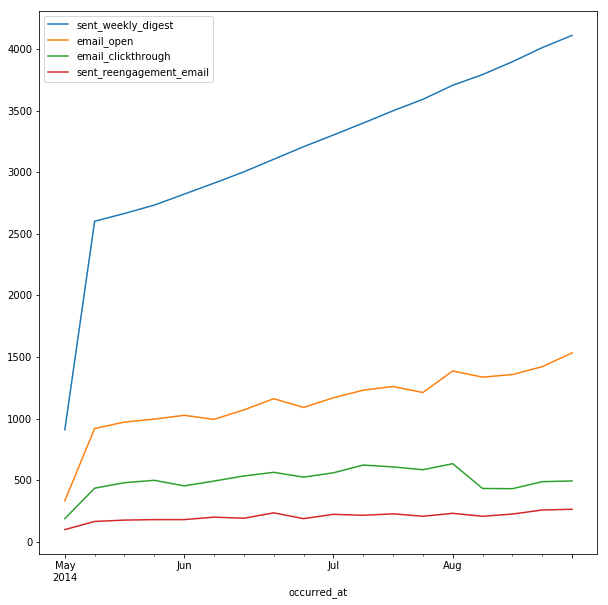

In [119]:
fig = plt.figure(figsize=(10,10))
for evname in emailsdf.action.unique():
    ax = emailsdf[emailsdf['action'] == evname].resample('W').count()['action'].plot(label=evname)
    ax.set_label(evname)
    ax.legend()

## ToDo

Look at company ID. Need to merge users table with events table and group by company ID. Maybe one large company stopped using the service

In [120]:
eventsdf_companyid = eventsdf.merge(usersdf, on='user_id')

In [121]:
eventsdf_companyid.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,created_at,company_id,language,activated_at,state
0,10522.0,2014-05-02,engagement,login,Japan,dell inspiron notebook,3.0,2014-04-04,1147.0,japanese,2014-04-04 16:49:36,active
1,10522.0,2014-05-02,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-04-04,1147.0,japanese,2014-04-04 16:49:36,active
2,10522.0,2014-05-02,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-04-04,1147.0,japanese,2014-04-04 16:49:36,active
3,10522.0,2014-05-02,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-04-04,1147.0,japanese,2014-04-04 16:49:36,active
4,10522.0,2014-05-02,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-04-04,1147.0,japanese,2014-04-04 16:49:36,active


In [123]:
eventsdf_companyid.index = eventsdf_companyid.occurred_at

In [132]:
eventsdf_companyid.company_id.value_counts()[:20]

1.0     20239
2.0     10409
3.0      6604
4.0      4086
6.0      3460
5.0      3044
8.0      2868
9.0      2089
7.0      2050
13.0     1818
10.0     1707
12.0     1621
11.0     1544
14.0     1380
28.0     1023
20.0     1004
Name: company_id, dtype: int64

In [133]:
eventsdf_companyid.device.value_counts()

macbook pro               59948
lenovo thinkpad           38679
macbook air               28104
iphone 5                  27134
dell inspiron notebook    20476
samsung galaxy s4         19594
nexus 5                   17249
iphone 5s                 16705
dell inspiron desktop     10569
iphone 4s                 10097
asus chromebook           10014
ipad air                   9994
acer aspire notebook       9372
hp pavilion desktop        9280
nexus 7                    6895
ipad mini                  5895
nokia lumia 635            5880
nexus 10                   5446
acer aspire desktop        5402
mac mini                   4622
htc one                    4485
kindle fire                4280
windows surface            3673
samsung galaxy note        2821
amazon fire phone          2298
samsumg galaxy tablet      1920
Name: device, dtype: int64

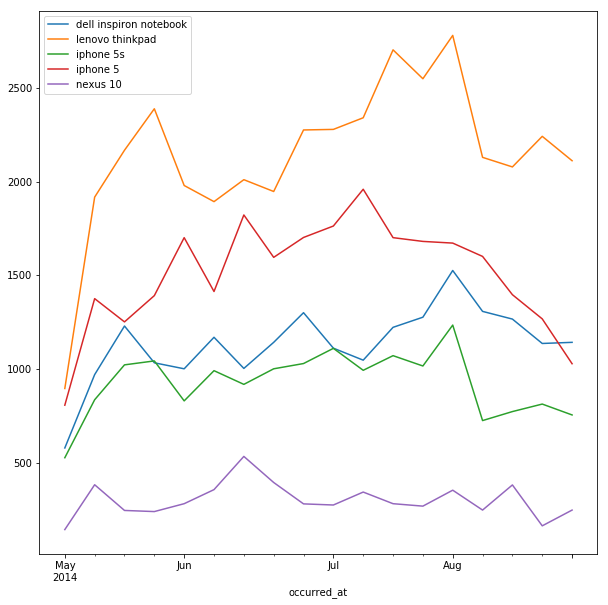

In [143]:
devicelist = eventsdf_companyid.device.unique()
_df = eventsdf_companyid

fig = plt.figure(figsize=(10,10))
for name in devicelist[:5]:
    ax = _df[_df.device == name].resample('W').count()['device'].plot(label=name)
    ax.set_label(evname)
    
ax.legend()
    
    
    

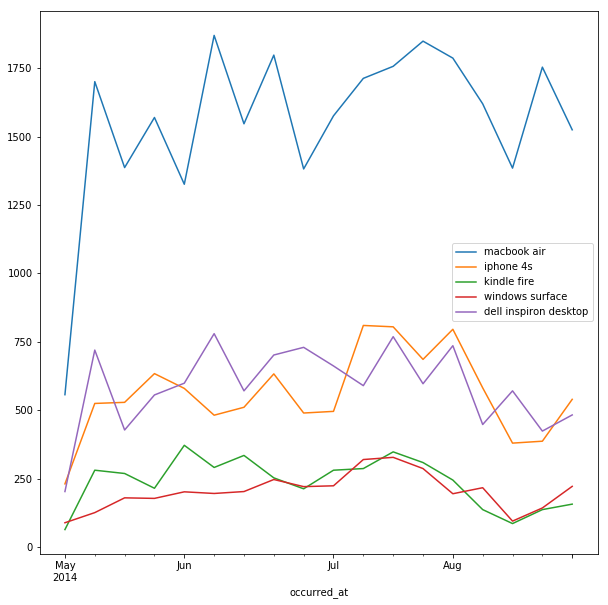

In [144]:
fig = plt.figure(figsize=(10,10))
for name in devicelist[5:10]:
    ax = _df[_df.device == name].resample('W').count()['device'].plot(label=name)
    ax.set_label(evname)
    
ax.legend()
    
    

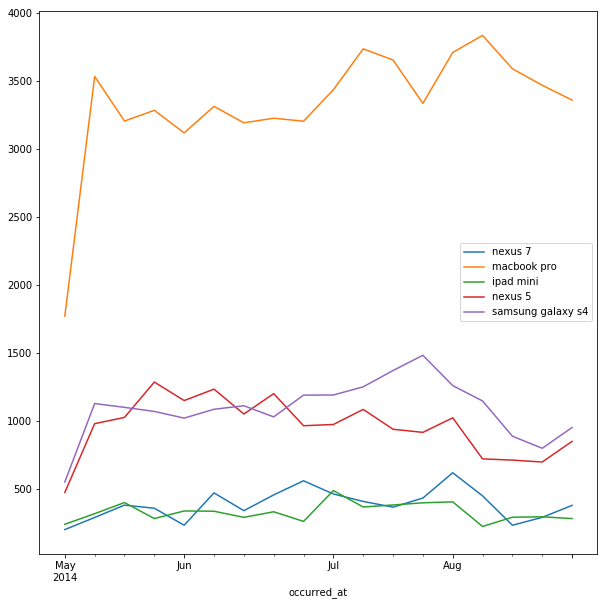

In [145]:
fig = plt.figure(figsize=(10,10))
for name in devicelist[10:15]:
    ax = _df[_df.device == name].resample('W').count()['device'].plot(label=name)
    ax.set_label(evname)
    
ax.legend()
    
    

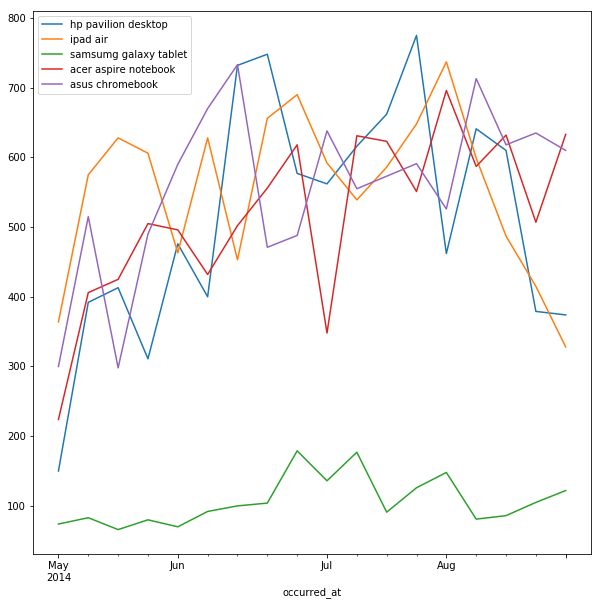

In [146]:
fig = plt.figure(figsize=(10,10))
for name in devicelist[15:20]:
    ax = _df[_df.device == name].resample('W').count()['device'].plot(label=name)
    ax.set_label(evname)
    
ax.legend()
    
    

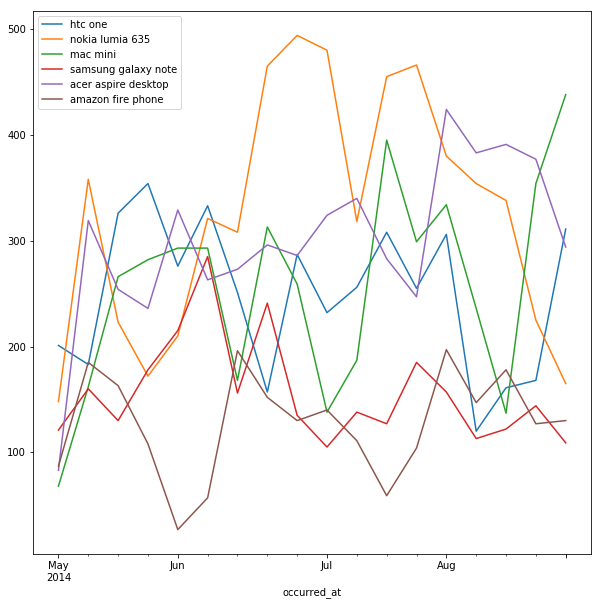

In [147]:
fig = plt.figure(figsize=(10,10))
for name in devicelist[20:]:
    ax = _df[_df.device == name].resample('W').count()['device'].plot(label=name)
    ax.set_label(evname)
    
ax.legend()
    
    

In [150]:
eventsdf_companyid.location.value_counts()

United States           94728
Japan                   26046
Germany                 23524
France                  17364
United Kingdom          16475
Russia                  12226
Italy                   11790
Brazil                  11240
India                    9620
Canada                   9126
Mexico                   9106
Australia                7494
Korea                    7180
Indonesia                6224
Spain                    5874
Netherlands              4494
Saudi Arabia             4104
Sweden                   3901
Poland                   3803
Switzerland              3760
Taiwan                   3600
Iran                     3122
Belgium                  2822
Malaysia                 2529
Austria                  2494
Turkey                   2432
United Arab Emirates     2343
South Africa             2324
Egypt                    2258
Denmark                  2191
Israel                   2130
Norway                   2020
Thailand                 2008
Colombia  

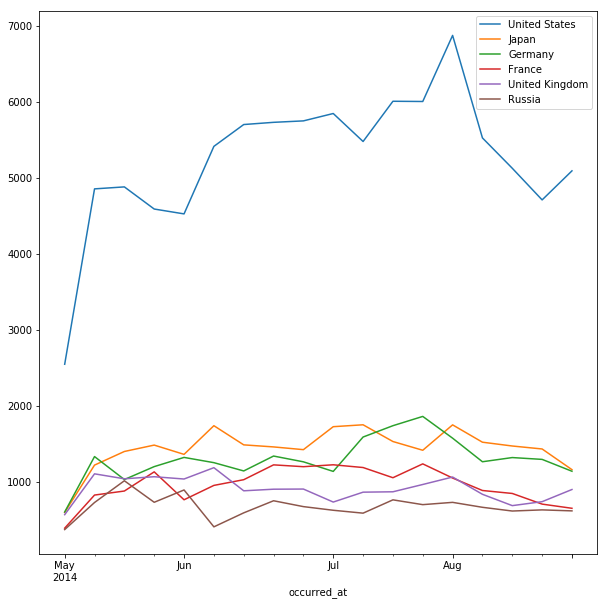

In [152]:
locationslist = eventsdf_companyid.location.unique()
locationslist = ['United States','Japan', 'Germany', 'France', 'United Kingdom', 'Russia']
_df = eventsdf_companyid

fig = plt.figure(figsize=(10,10))
for name in locationslist:
    ax = _df[_df.location == name].resample('W').count()['location'].plot(label=name)
    #ax.set_yscale("log", nonposy='clip')
    ax.set_label(evname)
    
ax.legend()
    